## NgoDoanKien-11201976


## 1 Implement GMM algorithm by Numpy.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn import metrics
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
class GMM:
    def __init__(self, k, max_iter=100):
        self.k = k  # number of clusters
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [X[row_index,:] for row_index in random_row]
        self.sigma = [np.cov(X.T) for _ in range(self.k)]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,
                                   aweights=(weight/total_weight).flatten(),
                                   bias=True)

    def fit(self, X):
        self.initialize(X)
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros((self.n, self.k))
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i], 
                                               cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

    def inertias_(self, X):
        inertias = []
        for x in X:
            dists = np.sqrt(np.sum((x - self.mu)**2, axis=1))
            inertias.append(np.min(dists))
        return np.sum(np.square(inertias))


## 2. Create at least [three toy dataset](https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [ ]:
def viz(X, y, labels=None):
    sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                hue=y,
                style=labels,
                palette="deep",
                legend=None)

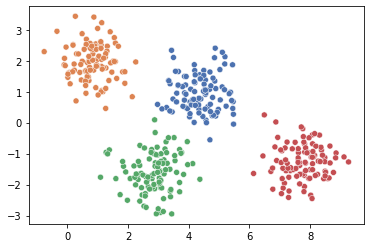

In [ ]:
viz(X, y_true)

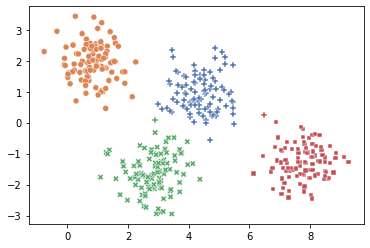

In [ ]:
gmm = GMM(k=4)
gmm.fit(X)
labels = gmm.predict(X)

viz(X, y_true, labels)

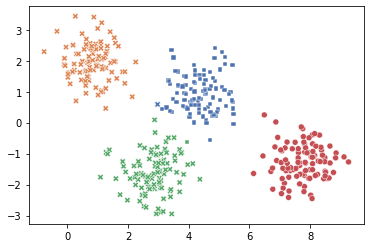

In [ ]:
gmm = GMM(k=3)
gmm.fit(X)
labels = gmm.predict(X)

viz(X, y_true, labels)

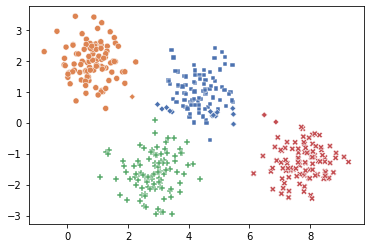

In [ ]:
gmm = GMM(k=5)
gmm.fit(X)
labels = gmm.predict(X)

viz(X, y_true, labels)

In [ ]:
def elbow_report(X):
    dist = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
        gmm = GMM(k=n_cluster)
        gmm.fit(X)
        dist.append(gmm.inertias_(X))
    plt.plot(n_clusters, dist, 'bo-', color='black')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Mean Mahalanobis Distance')
    plt.title('GMM Clustering for n_cluster=2 to 15')
    plt.show()

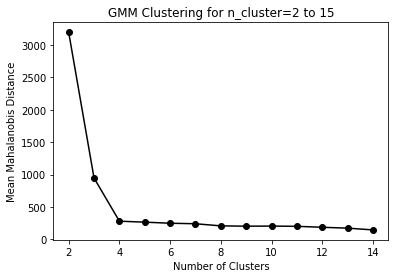

In [ ]:
elbow_report(X)

In [ ]:
def silhouette_scores(X):
    sil_score = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
        gmm = GMM(k=n_cluster)
        gmm.fit(X)
        labels = gmm.predict(X)
        # Calculate Silhoutte Score and append to a list
        sil_score.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.plot(n_clusters, sil_score, 'bo-', color='black')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Identify the number of clusters using Silhouette Score')
    plt.show()

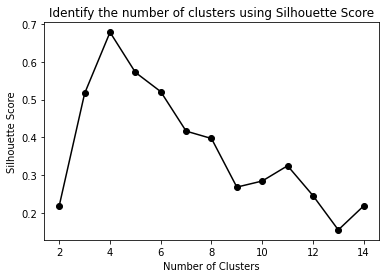

In [ ]:
silhouette_scores(X)

### Using library

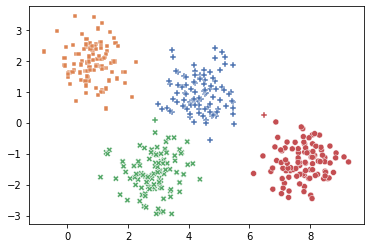

In [ ]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)

viz(X, y_true, labels)

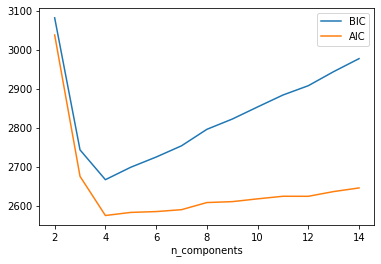

In [ ]:
n_components = np.arange(2, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
            for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

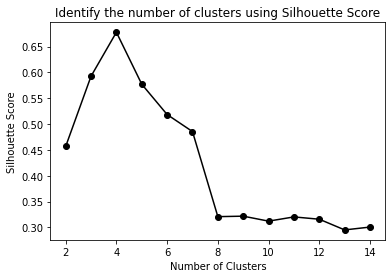

In [ ]:
def silhouette_scores(X):
    sil_score = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        labels = gmm.predict(X)
        # Calculate Silhoutte Score and append to a list
        sil_score.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.plot(n_clusters, sil_score, 'bo-', color='black')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Identify the number of clusters using Silhouette Score')
    plt.show()

silhouette_scores(X)

# 3. compare k-means and GMM

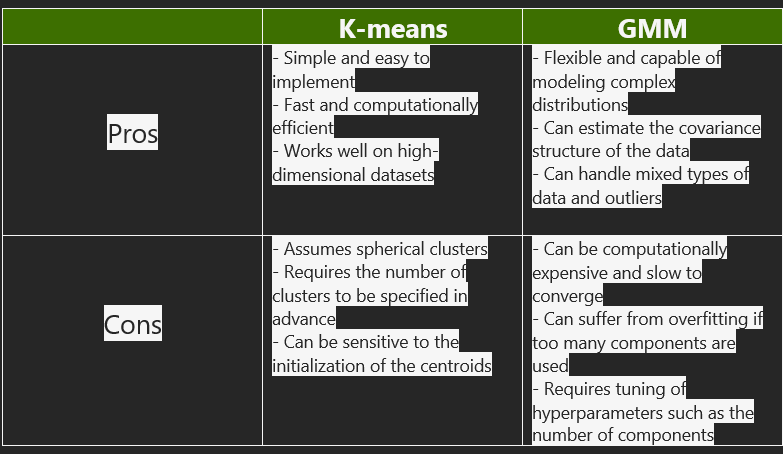

## 4. Find 3 examples that GMM is better than kmeans

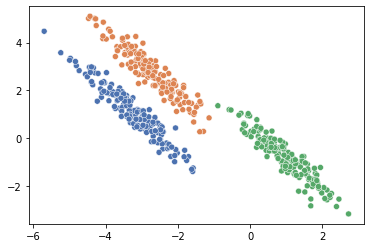

In [ ]:
X, y = make_blobs(n_samples=500, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
viz(X_aniso, y)

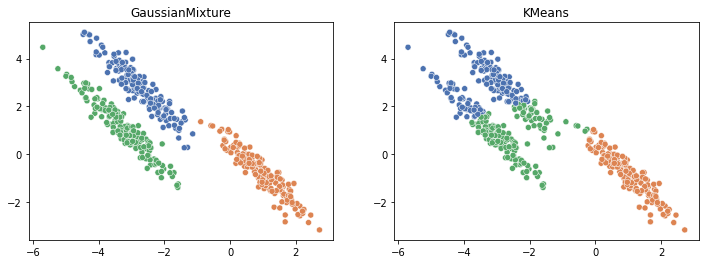

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))

for i, model in enumerate([GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_aniso)
    labels = model.predict(X_aniso)
    axis[i].set_title(type(model).__name__)
    ax = sns.scatterplot(x=[x[0] for x in X_aniso],
                        y=[x[1] for x in X_aniso],
                        hue=labels,
                        palette="deep",
                        legend=None, ax=axis[i])

#### Example 2: Unequal variance

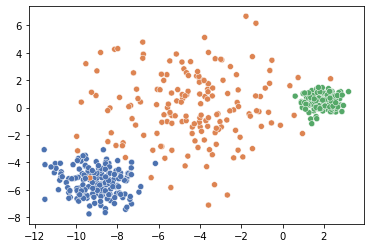

In [ ]:
X_varied, y = make_blobs(n_samples=500,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)
viz(X_varied, y)

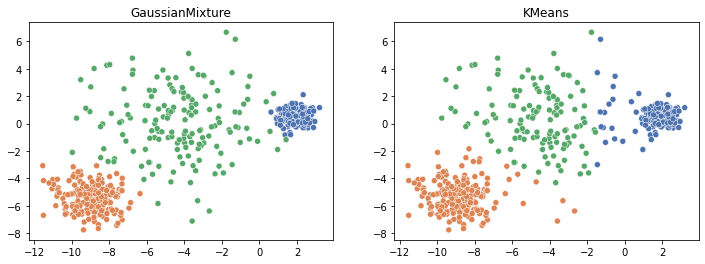

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))

for i, model in enumerate([GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_varied)
    labels = model.predict(X_varied)
    axis[i].set_title(type(model).__name__)
    ax = sns.scatterplot(x=[x[0] for x in X_varied],
                        y=[x[1] for x in X_varied],
                        hue=labels,
                        palette="deep",
                        legend=None, ax=axis[i])

#### Example 3: Unevenly sized blobs

<ipython-input-117-c3b8237854e1>:11: RuntimeWarning: covariance is not positive-semidefinite.
  cluster2 = np.random.multivariate_normal(mean2, cov2, 150)


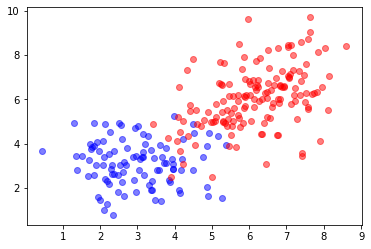

In [ ]:
np.random.seed(0)

# Generate cluster 1
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]] 
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate cluster 2
mean2 = [6, 6]
cov2 = [[1, 0], [1, 2]] 
cluster2 = np.random.multivariate_normal(mean2, cov2, 150)

X_test_1 = np.concatenate((cluster1, cluster2), axis = 0) 

# Plot the two clusters
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', alpha=0.5)
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', alpha=0.5)
plt.show()

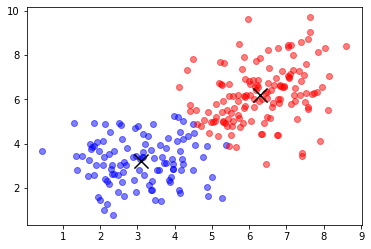

In [ ]:
def kmean(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    colors = ['b', 'r']
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]], alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
    plt.show()

kmean(X_test_1, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


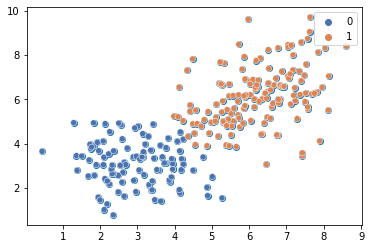

In [ ]:
def gmm_model_visualize(k, X):
    gm = GaussianMixture(n_components=k).fit(X)
    plt.scatter(X[:, 0], X[:, 1])
    y_pred = gm.predict(X)

    sns.scatterplot(X[:, 0], X[:, 1], hue=y_pred, palette="deep")

gmm_model_visualize(2, X_test_1)